# Classification Predection

### About Project:
This project is based on predection of a classification of a data
### About Data:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Create a model for predicting whether a client subscribes to a term deposit.

The main objective can be broken down into 4:
1.Compare the performance between each algorithm as follows:•Logistic Regression,
•Support Vector Machine,
•Decision Tree,
•Random Forest,
•K-Nearest Neighbors,
•Naive Bayes,
•AdaBoost.

2.Decide which algorithm that we will use based on the best performance on the chosen metrics.
3.Analyze which part of the model needs to be improved based on overall modeling stages.
4.Predict an input of a new client based on the deployed site.


## Preprocessing the Data

#### 1.Importing the requred

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

In [6]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score

#### 2.Importing the table

In [7]:
df=pd.read_csv("bank-additional-full.csv")
print(df.head())
print("-----------------------------------------------------------------------------------------------")
print("Columns names")
print(df.columns)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

#### 3.Describing data

In [8]:
print("Data Description")
print(df.describe())
print("-----------------------------------------------------------------------------------------------")
print("Number of rows and columns")
print(df.shape)
print("-----------------------------------------------------------------------------------------------")
print("data information")
print(df.info())
print("-----------------------------------------------------------------------------------------------")

Data Description
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.019010  
std        1.570960        0.578840  

In [9]:
print("Data percentaile")
print(df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
print("------------ -----------------------------------------------------------------------------------")
print("Checking for null")
print(df.isnull().sum())
#after varyfing the data we found that there is no missing of data
print("there is no null or missing data in the selected sourse")

Data percentaile
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
1%        23.00000     11.000000      1.000000      3.000000      0.000000   
2%        24.00000     17.000000      1.000000      6.000000      0.000000   
3%        25.00000     23.000000      1.000000      9.000000      0.000000   
4%        25.00000     29.000000      1.000000    999.000000      0.000000   
5%        26.00000     36.000000      1.000000    999.000000      0.000000   
6%        27.00000     42.000000      1.000000    999.000000      0.000000   
7%        27.00000     47.000000      1.000000    999.000000      0.000000   
8%        28.00000     51.000000      1.000000 

#### 4.Checking for Null data and duplicates and removing them

In [10]:
print(df.isnull().any())

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool


In [11]:
print(df.duplicated().any())

True


In [12]:
print(f"Duplicated {len(df[df.duplicated()])} rows on idx: {list(df[df.duplicated()].index)}")
print(df[df.duplicated()])

Duplicated 12 rows on idx: [1266, 12261, 14234, 16956, 18465, 20216, 20534, 25217, 28477, 32516, 36951, 38281]
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   4

##### 4.1 In this we have12 duplicate data so we are removing it

In [13]:
print(f"Duplicated {len(df[df.duplicated()])} rows on idx: {list(df[df.duplicated()].index)}")
print(df[df.duplicated()])

Duplicated 12 rows on idx: [1266, 12261, 14234, 16956, 18465, 20216, 20534, 25217, 28477, 32516, 36951, 38281]
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   4

##### 4.2 Droping the duplicate data

In [14]:
df = df.drop_duplicates(keep='first')
df.reset_index(drop = True, inplace = True)

In [15]:
print(f"Rows, Cols - After: {df.shape[0], df.shape[1]}")

Rows, Cols - After: (41176, 21)


##### 4.3 Renameing the columns (removing the "." and replaceing with "_")

In [16]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [17]:
df.columns = df.columns.str.replace('.', '_', regex = False)
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


#### 5.Changing the datatype

In [18]:
df[['y']] = df[['y']].astype('category')
print(df.dtypes)

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp_var_rate       float64
cons_price_idx     float64
cons_conf_idx      float64
euribor3m          float64
nr_employed          int64
y                 category
dtype: object


In [19]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.y.drop_duplicates())
df.sex = label.transform(df.y)

In [20]:
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41171   73      retired  married  professional.course       no     yes   no   
41172   46  blue-collar  married  professional.course       no      no   no   
41173   56      retired  married    university.degree       no     yes   no   
41174   44   technician  married  professional.course       no      no   no   
41175   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

#### 6.Data Exploration (EDA)

In [21]:
num_cols = list(df.select_dtypes("number").columns)
print("Num Features Length",len(num_cols), ":", num_cols)

Num Features Length 10 : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


## Visualizeing and Analysing the Data

#### 1. Visualizeing the data

In [22]:
num_cols_skewness = df[num_cols].skew()

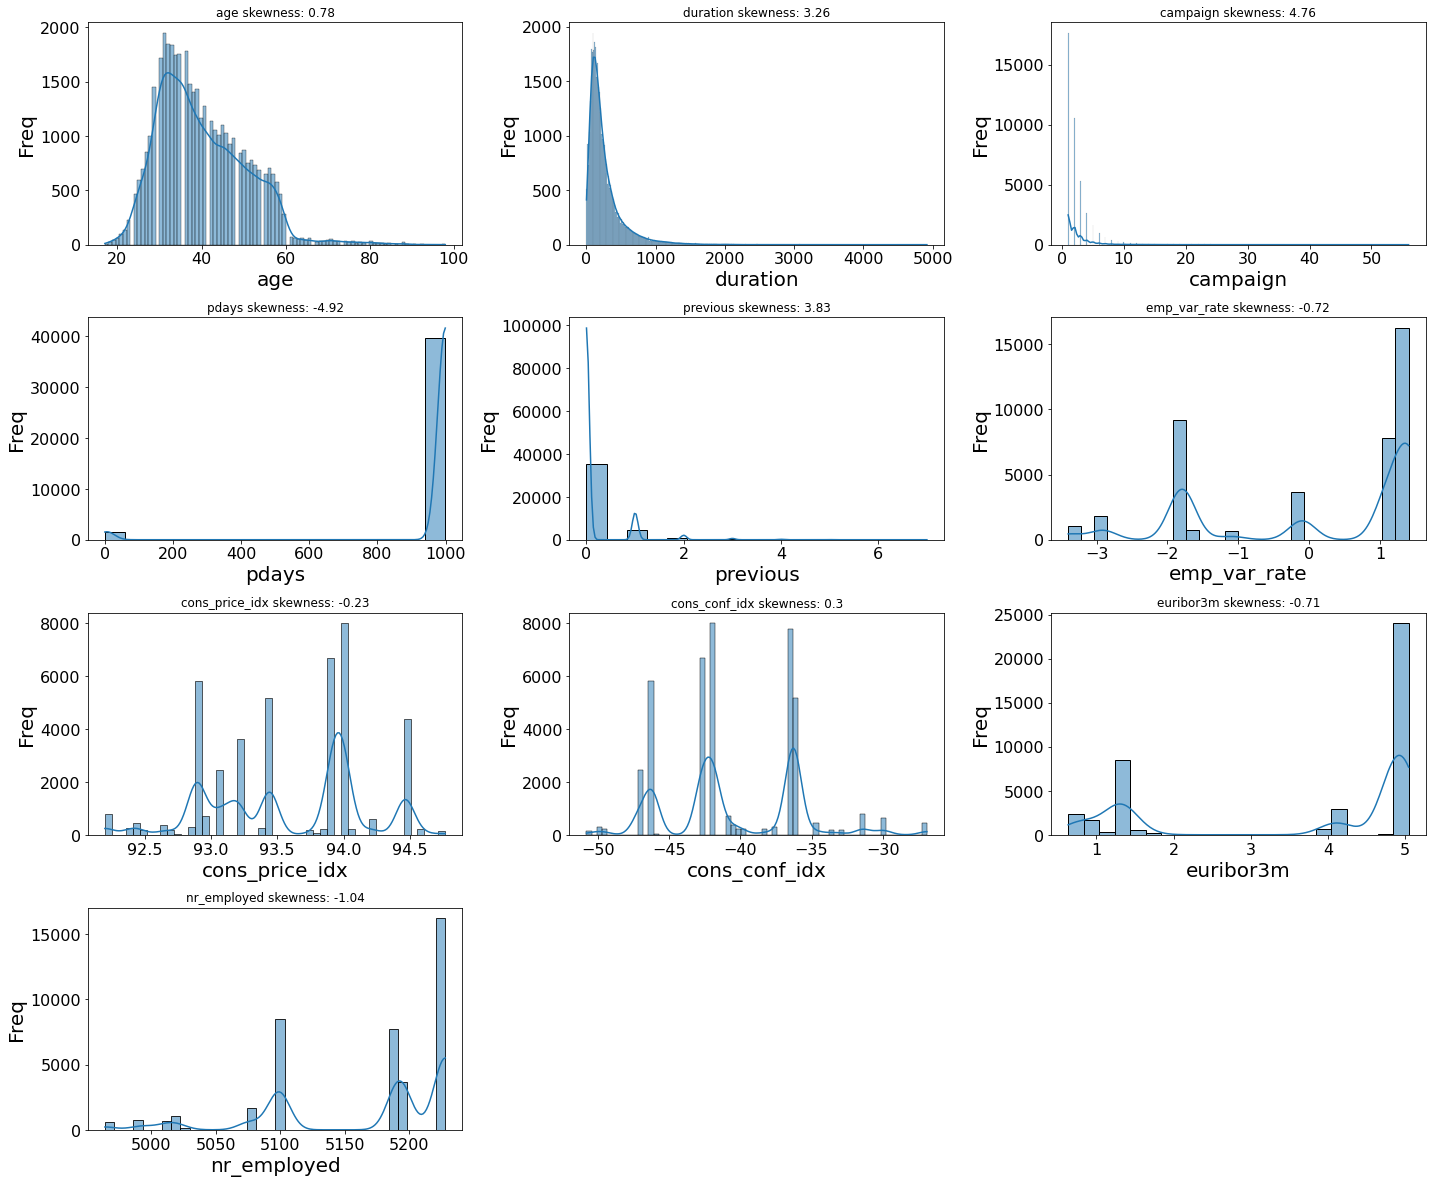

In [23]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.histplot(
        df[num_cols[i]],
        kde = True
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
    ax.set_title(str(num_cols[i]) + ' skewness: ' + str(round(num_cols_skewness[i], 2)))
plt.tight_layout()
plt.show()

In [24]:
#sns.pairplot(data=df,hue="y",hue_order=["yes","no"])

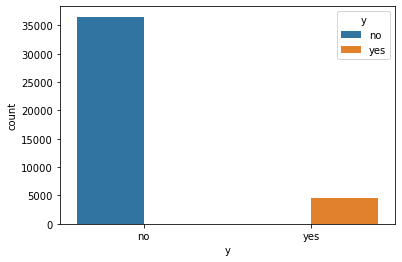

In [25]:
sns.countplot(data=df,x="y",hue="y")
plt.show()

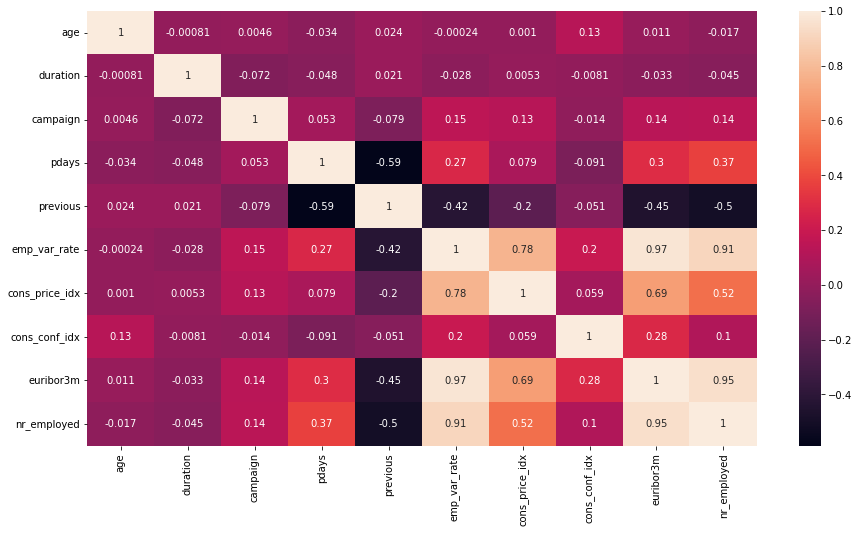

In [26]:
corr=df.corr()
plt.figure(figsize=[15,8])
sns.heatmap(data=corr,annot=True)
plt.show()

#### 2.Selecting only the catgirial features and describing them

In [27]:
cat_cols = list(df.select_dtypes(object))
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


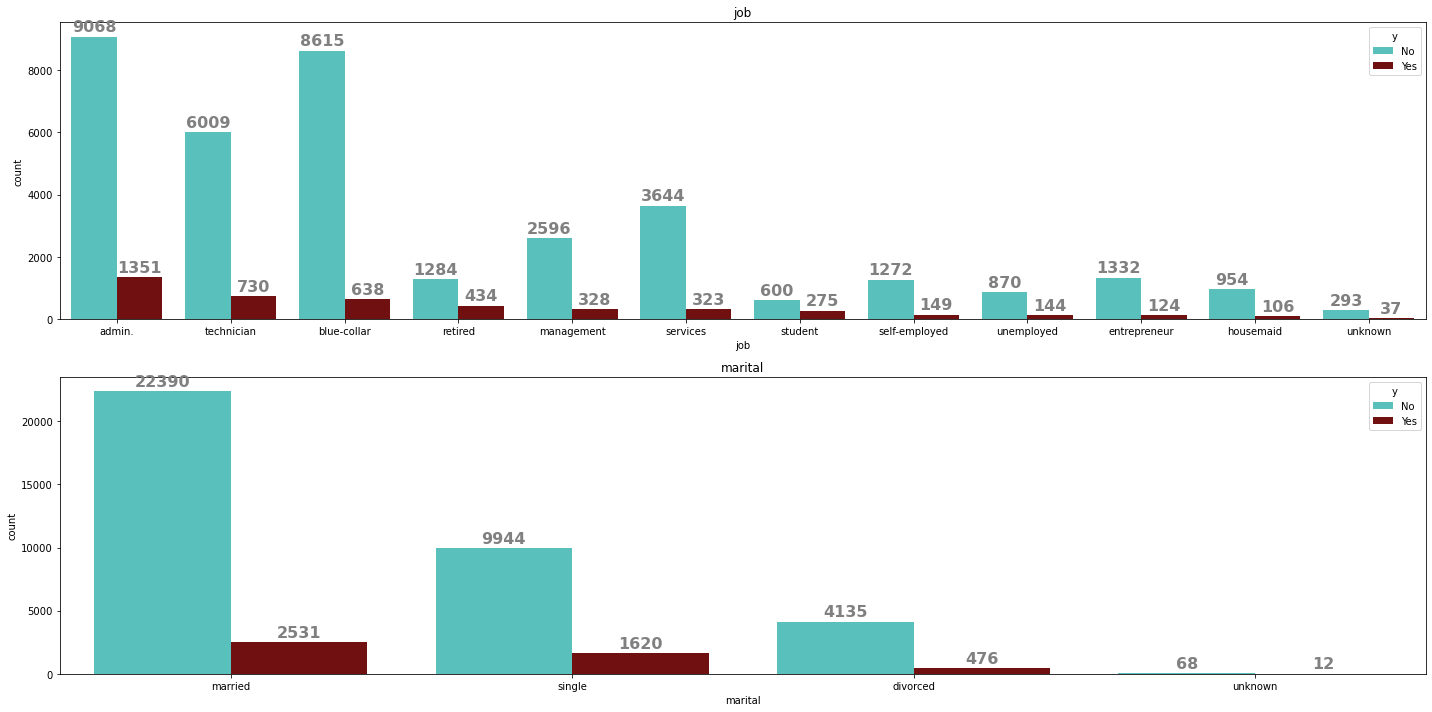

In [28]:
# plot all categorical features
plt.figure(figsize = (20, 10))
for i in range(len(cat_cols[:2])):
    # plot
    plt.subplot(len(cat_cols[:2])//1, 1, i + 1)
    ax = sns.countplot(
        x = df[cat_cols[:2][i]],
        hue = df['y'],
        order = pd.crosstab(df[cat_cols[:2][i]], df['y']).sort_values("yes", ascending = False).index,
        palette = {"yes":"maroon", "no":"mediumturquoise"}
    )
    plt.title(cat_cols[:2][i], fontweight = 20)
    
    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
        L = ax.legend(loc='upper right', title="y")
        L.get_texts()[0].set_text('No')
        L.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

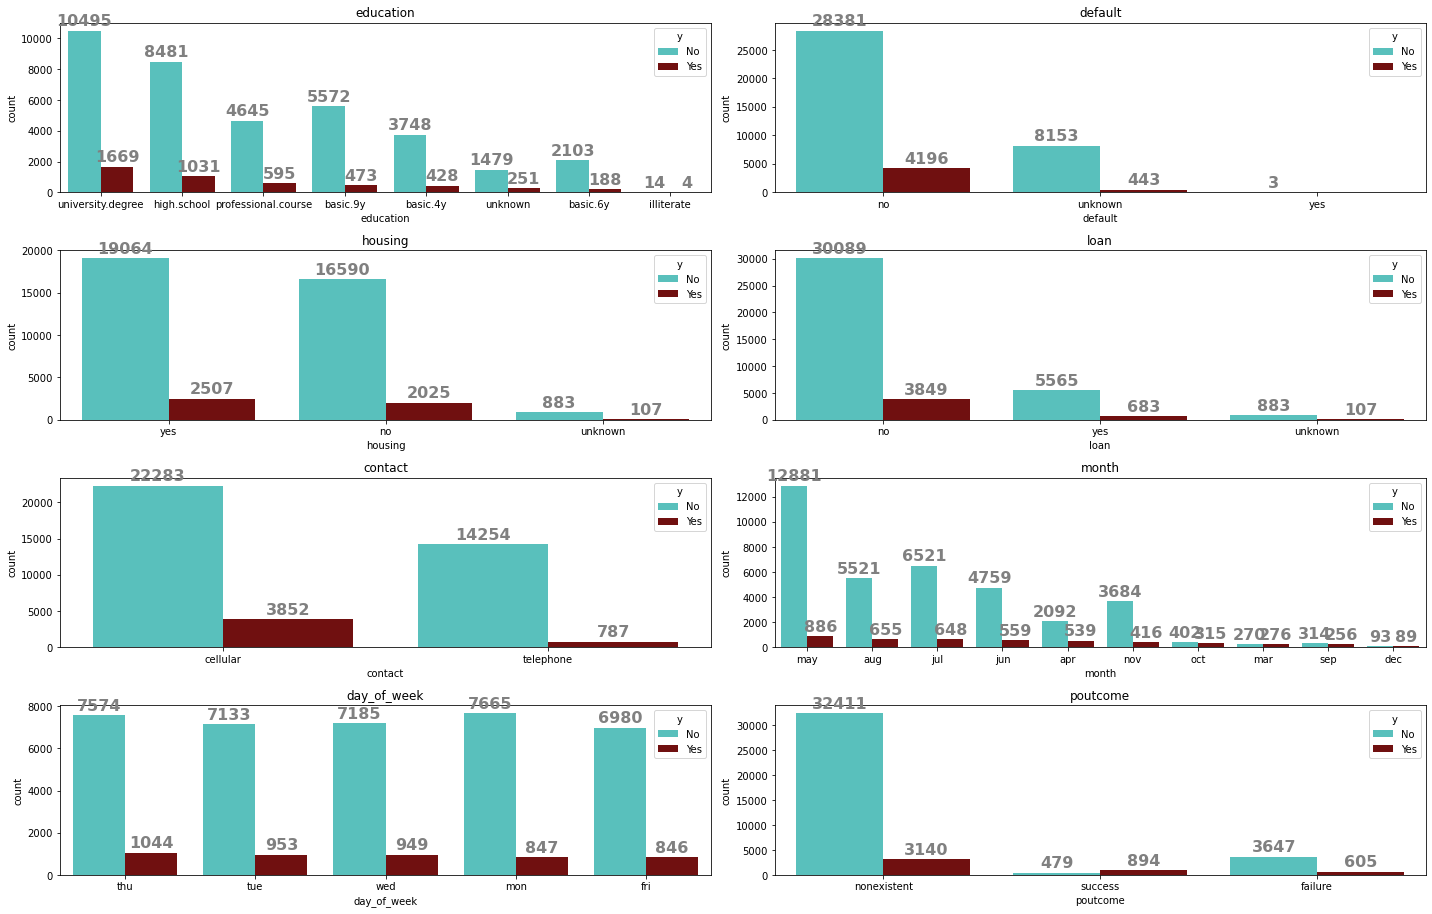

In [29]:
# plot all categorical features
plt.figure(figsize = (20, 25))
for i in range(len(cat_cols[2:])):
    plt.subplot(len(cat_cols[2:])//1, 2, i + 1)
    ax = sns.countplot(
        x = df[cat_cols[2:][i]],
        hue = df['y'],
        # order by frequency
        order = pd.crosstab(df[cat_cols[2:][i]], df['y']).sort_values("yes", ascending = False).index,
        palette = {"yes":"maroon", "no":"mediumturquoise"}
    )
    plt.title(cat_cols[2:][i], fontweight = 20)
    
    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
        L = ax.legend(loc='upper right', title="y")
        L.get_texts()[0].set_text('No')
        L.get_texts()[1].set_text('Yes')
plt.tight_layout()

plt.show()

In [30]:
df["target"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)
df.drop(columns=["y"], inplace = True)

In [31]:
print(df[["target"]])

      target
0          0
1          0
2          0
3          0
4          0
...      ...
41171      1
41172      0
41173      0
41174      1
41175      0

[41176 rows x 1 columns]


#### 3.Replace and String Formatting

In [32]:
df["job"] = df["job"].str.replace('.', '', regex = False)
df["education"] = df["education"].str.replace('.', ' ', regex = False)

In [33]:
print(df["pdays"].value_counts())

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64


#### 4.Spliting data

In [34]:
X = df.drop(columns = ['target'], axis = 1)
y = df['target']

In [35]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.3, random_state = 42)# , stratify = y

In [36]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 1/3, random_state = 42, stratify = y_)

In [37]:
print(len(X_train)/len(X), len(X_val)/len(X), len(X_test)/len(X))

0.699995142801632 0.19999514280163203 0.10000971439673596


#### 5.Checking the proportion (effect of stratify param)

In [38]:
print(sum(y_train==1)/len(y_train), sum(y_val==1)/len(y_val), sum(y_test==1)/len(y_test))

0.11154286507303196 0.11523982999392836 0.11534725594949004


#### 6.Features Scaling using Pipeline

In [39]:
label = LabelEncoder()

label.fit(X_train.job.drop_duplicates())
X_train.job = label.transform(X_train.job)

label.fit(X_train.marital.drop_duplicates())
X_train.marital = label.transform(X_train.marital)

label.fit(X_train.education.drop_duplicates())
X_train.education = label.transform(X_train.education)

label.fit(X_train.default.drop_duplicates())
X_train.default = label.transform(X_train.default)

label.fit(X_train.housing.drop_duplicates())
X_train.housing = label.transform(X_train.housing)

label.fit(X_train.loan.drop_duplicates())
X_train.loan = label.transform(X_train.loan)

label.fit(X_train.contact.drop_duplicates())
X_train.contact = label.transform(X_train.contact)

label.fit(X_train.month.drop_duplicates())
X_train.month = label.transform(X_train.month)

label.fit(X_train.day_of_week.drop_duplicates())
X_train.day_of_week = label.transform(X_train.day_of_week)

label.fit(X_train.poutcome.drop_duplicates())
X_train.poutcome = label.transform(X_train.poutcome)

In [40]:
label = LabelEncoder()

label.fit(X_test.job.drop_duplicates())
X_test.job = label.transform(X_test.job)

label.fit(X_test.marital.drop_duplicates())
X_test.marital = label.transform(X_test.marital)

label.fit(X_test.education.drop_duplicates())
X_test.education = label.transform(X_test.education)

label.fit(X_test.default.drop_duplicates())
X_test.default = label.transform(X_test.default)

label.fit(X_test.housing.drop_duplicates())
X_test.housing = label.transform(X_test.housing)

label.fit(X_test.loan.drop_duplicates())
X_test.loan = label.transform(X_test.loan)

label.fit(X_test.contact.drop_duplicates())
X_test.contact = label.transform(X_test.contact)

label.fit(X_test.month.drop_duplicates())
X_test.month = label.transform(X_test.month)

label.fit(X_test.day_of_week.drop_duplicates())
X_test.day_of_week = label.transform(X_test.day_of_week)

label.fit(X_test.poutcome.drop_duplicates())
X_test.poutcome = label.transform(X_test.poutcome)

#### 7.Fitting in pipeline for scalling

In [41]:
scaling_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [42]:
scaling_pipeline.fit(X_train)

Pipeline(steps=[('std_scaler', StandardScaler())])

In [43]:
X_train_trf=scaling_pipeline.fit_transform(X_train)

In [44]:
X_test_trf = scaling_pipeline.fit_transform(X_test)

## Predection

#### 1.Support vector machine

In [45]:
hyperparameters = {
    'kernel': ['poly', 'rbf']
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
svc = SVC(random_state = 42, gamma = 'auto', max_iter = 2000)
svc_grid = GridSearchCV(svc, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
svc_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto', max_iter=2000, random_state=42),
             param_grid={'kernel': ['poly', 'rbf']}, refit='auc',
             return_train_score=True, scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [46]:
svc_grid.best_params_

{'kernel': 'rbf'}

In [47]:
svc_pred=svc_grid.predict(X_test_trf)

In [48]:
svc_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [49]:
predection=pd.DataFrame(svc_pred)
predection.columns=["predected_output"]

In [50]:
print(predection.head())

   predected_output
0                 0
1                 0
2                 0
3                 0
4                 0


In [51]:
y_test=np.array(y_test)
Actual=pd.DataFrame(y_test)
Actual.columns=["Actual"]

In [52]:
print(Actual.head())

   Actual
0       0
1       0
2       0
3       0
4       0


In [53]:
ps=pd.DataFrame()
ps["predection"]=predection.predected_output
ps["Actual"]=Actual.Actual
print(ps.head())

   predection  Actual
0           0       0
1           0       0
2           0       0
3           0       0
4           0       0


#### 2.Test scores

In [54]:
svc_grid.best_score_

0.9156967455933701

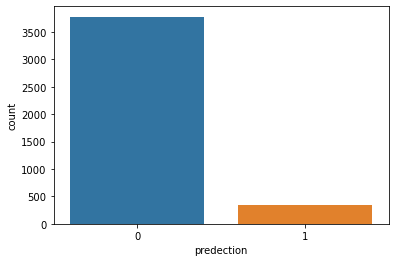

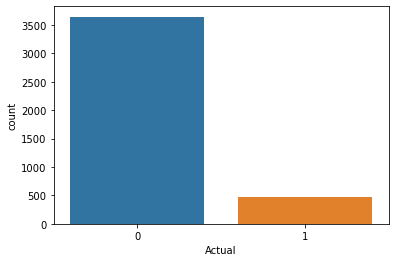

In [55]:
sns.countplot(data=ps,x="predection")
plt.show()
sns.countplot(data=ps,x="Actual")
plt.show()

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predection))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predection))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predection)))

Mean Absolute Error: 0.11656143759106362
Mean Squared Error: 0.11656143759106362
Root Mean Squared Error: 0.34141095118795417
